In [1]:
d <- read.table("aneurysm.csv", header=T, sep=";", stringsAsFactors=T)

In [2]:
head(d)

,country,gender,aneurysm,bmi,risk
,<fct>,<fct>,<int>,<dbl>,<int>
1,Vietnam,M,21,21.094,0
2,Vietnam,M,27,19.031,0
3,Vietnam,M,28,20.313,0
4,Vietnam,F,33,17.778,0
5,France,F,34,21.604,0
6,Vietnam,F,35,21.096,0


In [3]:
dim(d)

[1] 209   5

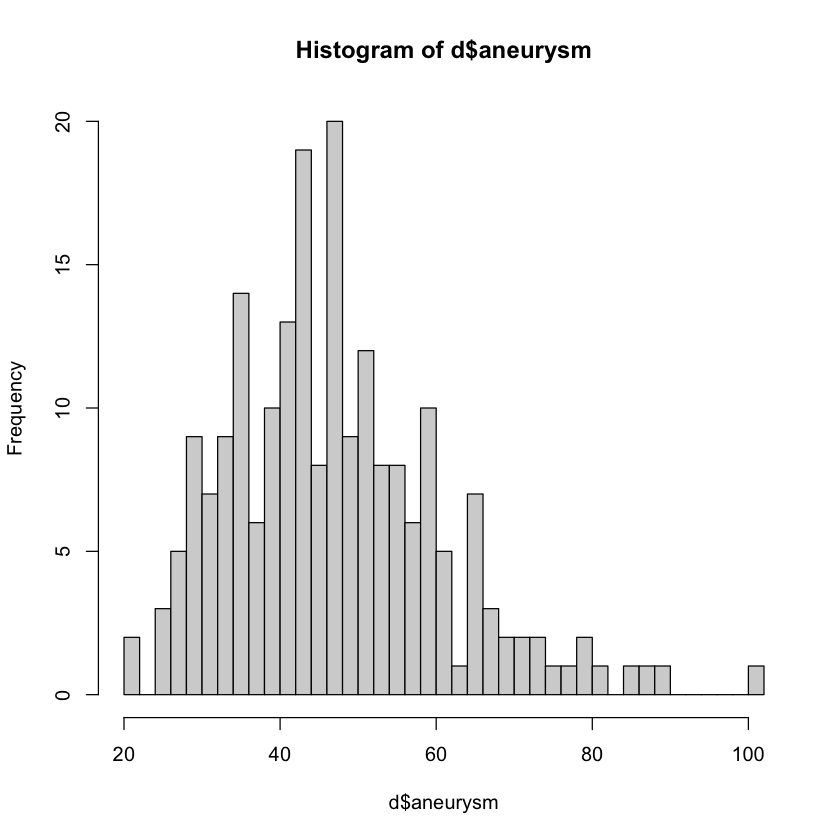

In [4]:
hist(d$aneurysm, nclass=50)

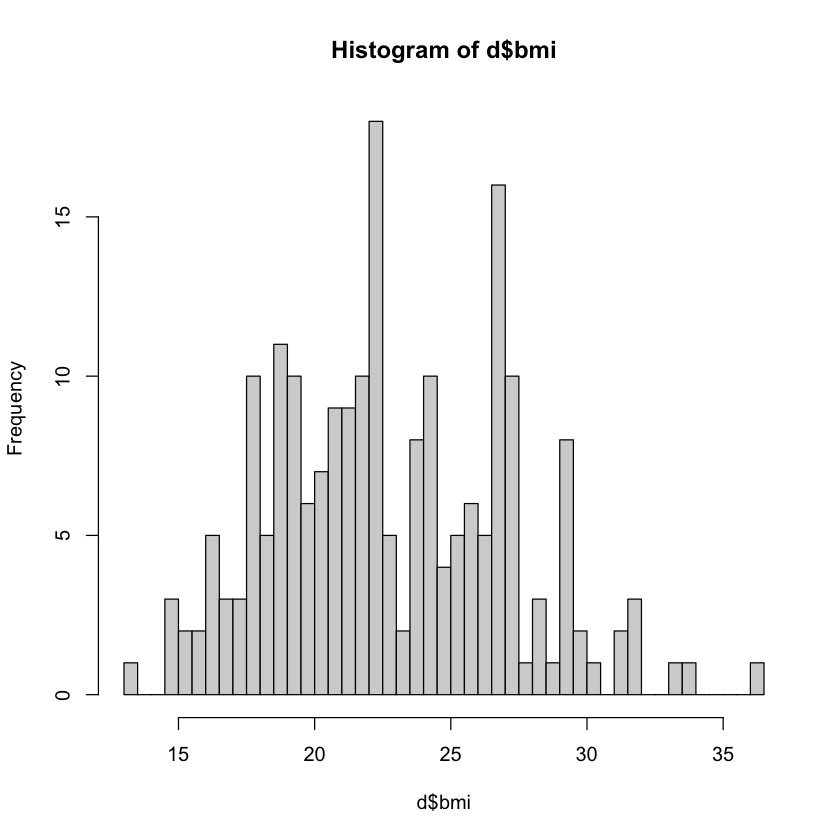

In [5]:
hist(d$bmi, nclass=50)

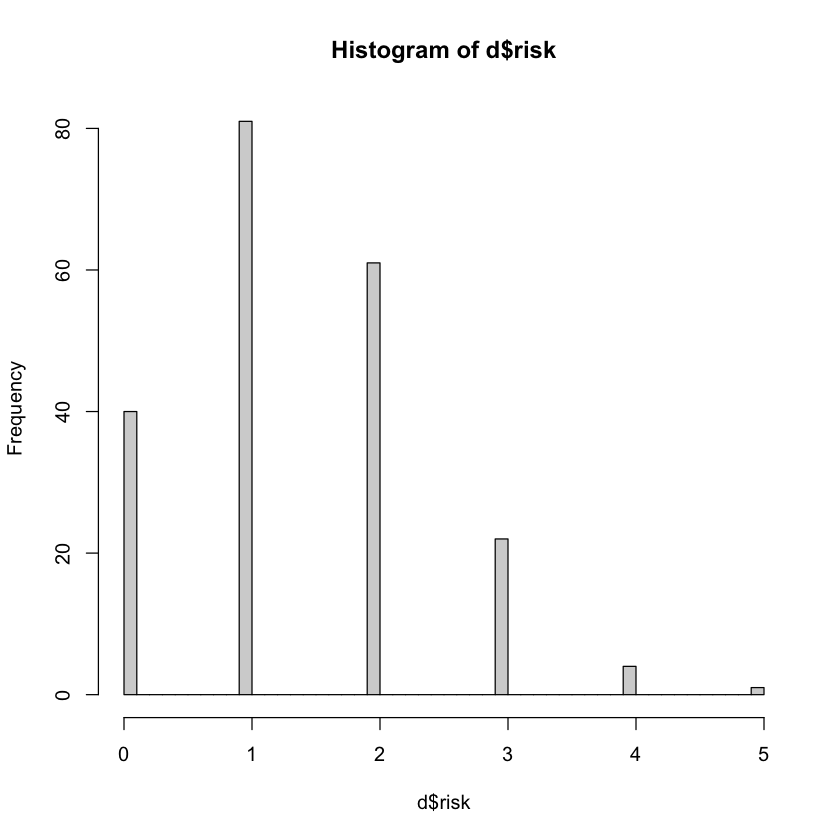

In [6]:
hist(d$risk, nclass = 50)

In [7]:
d.k4 <- kmeans(d$risk, centers=4)

In [8]:
d.k4

K-means clustering with 4 clusters of sizes 121, 83, 4, 1

Cluster means:
       [,1]
1 0.6694215
2 2.2650602
3 4.0000000
4 5.0000000

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[186] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 4

Within cluster sum of squares by cluster:
[1] 26.77686 16.16867  0.00000  0.00000
 (between_SS / total_SS =  79.5 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [9]:
d.k5 <- kmeans(d$risk, centers=5)

In [10]:
d.k5

K-means clustering with 5 clusters of sizes 5, 22, 61, 40, 81

Cluster means:
  [,1]
1  4.2
2  3.0
3  2.0
4  0.0
5  1.0

Clustering vector:
  [1] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [38] 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 [75] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
[112] 5 5 5 5 5 5 5 5 5 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[149] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2
[186] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1

Within cluster sum of squares by cluster:
[1] 0.8 0.0 0.0 0.0 0.0
 (between_SS / total_SS =  99.6 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [11]:
install.packages("mclust", dependencies=T)


Les packages binaires t'el'echarg'es sont dans
	/var/folders/lb/qcvqx8917_7gvcqgrtn8t4n80000gn/T//RtmpgNsBX3/downloaded_packages


In [11]:
library("mclust")

Warning message:
"le package 'mclust' a 'et'e compil'e avec la version R 4.3.3"
Package 'mclust' version 6.1.1
Type 'citation("mclust")' for citing this R package in publications.



In [12]:
d.mc<- Mclust(d$risk, G=3:7)

In [15]:
d.mc$G

[1] 4

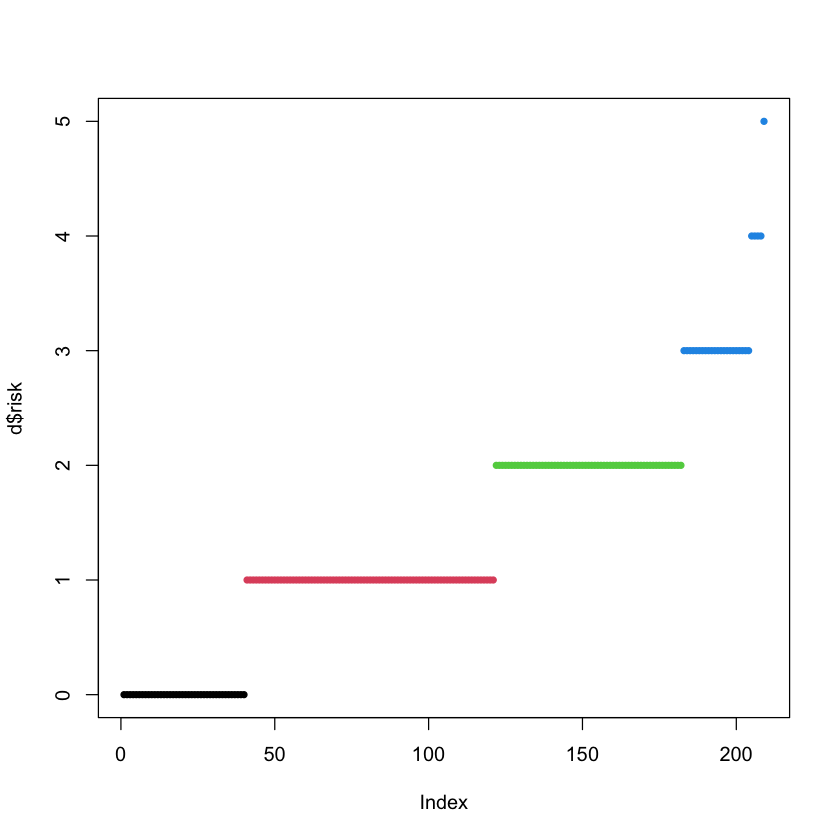

In [13]:
plot(x=d$risk, pch=20, col = d.mc$classification)

In [14]:
d.mc.b<- Mclust(d$risk, G=3:7)

In [15]:
d.mc.b$G

[1] 4

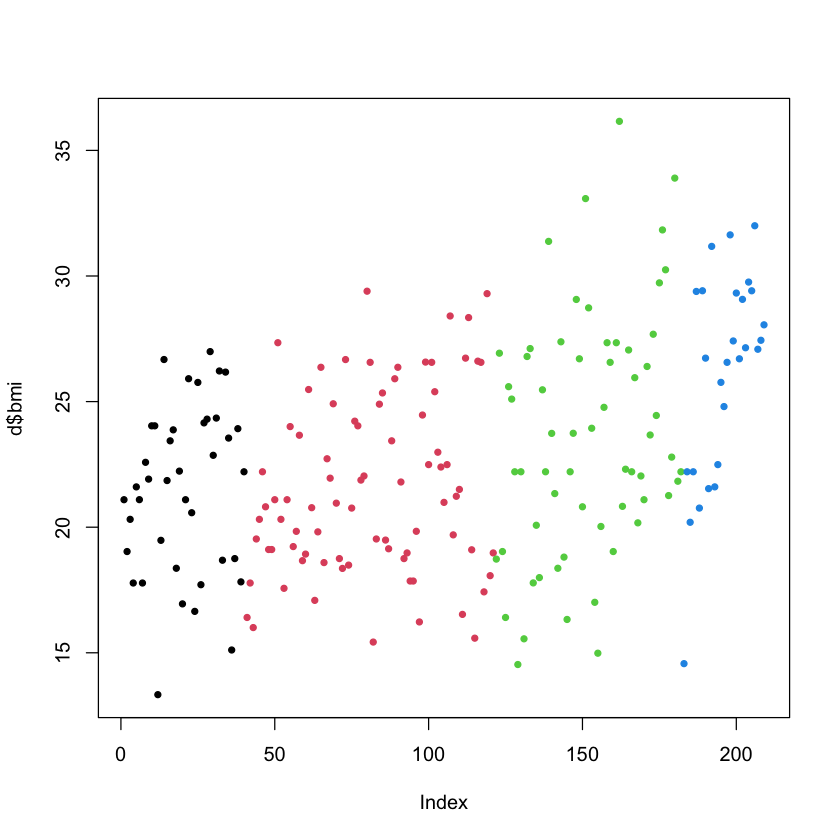

In [ ]:
plot(x=d$bmi,  pch=20, col = d.mc.b$classification)

In [17]:
lm1=with(d, lm(d$bmi ~ as.factor(d$country) + as.factor(d$gender) +as.factor(d$aneurysm) + as.factor(d$risk)))

In [18]:
anova(lm1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
as.factor(d$country),1,1898.96440,1898.964405,216.4664403,9.203646e-31
as.factor(d$gender),1,63.93458,63.934576,7.2880197,7.749966e-03
as.factor(d$aneurysm),53,434.29304,8.194208,0.9340729,6.037502e-01
as.factor(d$risk),5,139.81997,27.963994,3.1876671,9.197560e-03
Residuals,148,1298.33859,8.772558,NA,NA


In [19]:
lm11=with(d, lm(d$risk ~ as.factor(d$country) + as.factor(d$gender) +as.factor(d$aneurysm) + as.factor(d$bmi)))

In [20]:
anova(lm11)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
as.factor(d$country),1,11.644019,11.6440191,14.810305,0.002706893
as.factor(d$gender),1,14.866866,14.8668665,18.909521,0.001158255
as.factor(d$aneurysm),53,44.558680,0.8407298,1.069344,0.485073339
as.factor(d$bmi),142,129.889773,0.9147167,1.163450,0.418611987
Residuals,11,8.648317,0.7862106,NA,NA


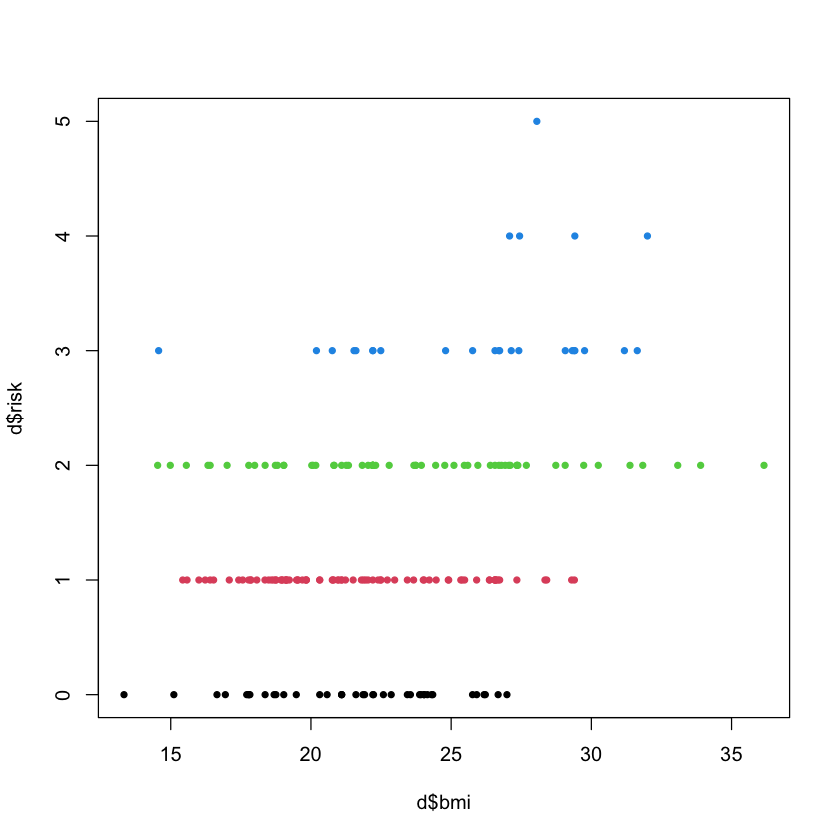

In [33]:
plot(x=d$bmi, y=d$risk, pch=20, col = d.mc$classification)

In [35]:
table(d$bmi, d.mc$classification)

        
         1 2 3 4
  13.333 1 0 0 0
  14.533 0 0 1 0
  14.568 0 0 0 1
  14.984 0 0 1 0
  15.111 1 0 0 0
  15.427 0 1 0 0
  15.556 0 0 1 0
  15.582 0 1 0 0
  16.004 0 1 0 0
  16.228 0 1 0 0
  16.327 0 0 1 0
  16.406 0 1 1 0
  16.529 0 1 0 0
  16.649 1 0 0 0
  16.947 1 0 0 0
  17.01  0 0 1 0
  17.087 0 1 0 0
  17.425 0 1 0 0
  17.567 0 1 0 0
  17.71  1 0 0 0
  17.778 2 1 0 0
  17.782 0 0 1 0
  17.823 1 0 0 0
  17.857 0 2 0 0
  17.993 0 0 1 0
  18.07  0 1 0 0
  18.359 0 1 0 0
  18.365 1 0 1 0
  18.491 0 1 0 0
  18.591 0 1 0 0
  18.667 0 1 0 0
  18.685 1 0 0 0
  18.73  0 0 1 0
  18.75  1 2 0 0
  18.809 0 0 1 0
  18.929 0 1 0 0
  18.975 0 2 0 0
  19.031 1 0 2 0
  19.1   0 1 0 0
  19.111 0 2 0 0
  19.141 0 1 0 0
  19.228 0 1 0 0
  19.477 1 0 0 0
  19.487 0 1 0 0
  19.531 0 2 0 0
  19.694 0 1 0 0
  19.814 0 1 0 0
  19.835 0 1 0 0
  19.837 0 1 0 0
  20.029 0 0 1 0
  20.077 0 0 1 0
  20.173 0 0 1 0
  20.196 0 0 0 1
  20.313 1 2 0 0
  20.576 1 0 0 0
  20.761 0 1 0 1
  20.776 0 1 0 0
  20.